In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('wine-clustering.csv')

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

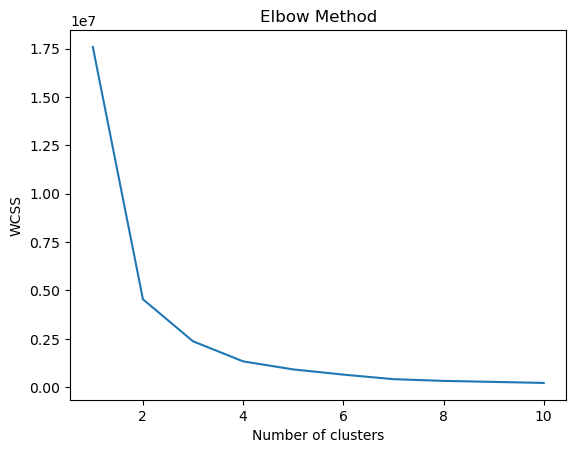

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Create separate dataframes for each cluster
cluster_dataframes = [df[df['Cluster'] == i] for i in range(3)]

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
cluster_dataframes

[     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
 59     12.37        0.94  1.36          10.6         88           1.98   
 61     12.64        1.36  2.02          16.8        100           2.02   
 63     12.37        1.13  2.16          19.0         87           3.50   
 64     12.17        1.45  2.53          19.0        104           1.89   
 66     13.11        1.01  1.70          15.0         78           2.98   
 ..       ...         ...   ...           ...        ...            ...   
 162    12.85        3.27  2.58          22.0        106           1.65   
 165    13.73        4.36  2.26          22.5         88           1.28   
 170    12.20        3.03  2.32          19.0         96           1.25   
 171    12.77        2.39  2.28          19.5         86           1.39   
 177    14.13        4.10  2.74          24.5         96           2.05   
 
      Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
 59         0.57

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Cluster               178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.960674
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.859394
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


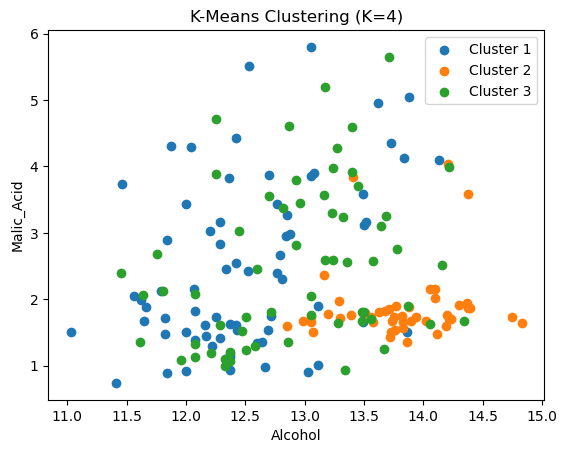

In [11]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Alcohol'], cluster_df['Malic_Acid'], label=f'Cluster {i + 1}')

plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

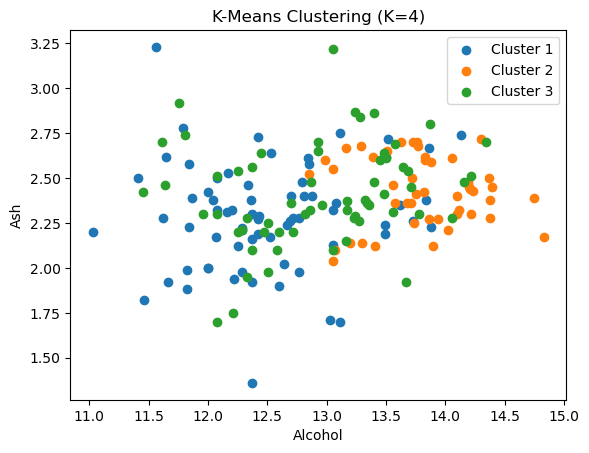

In [12]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Alcohol'], cluster_df['Ash'], label=f'Cluster {i + 1}')

plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

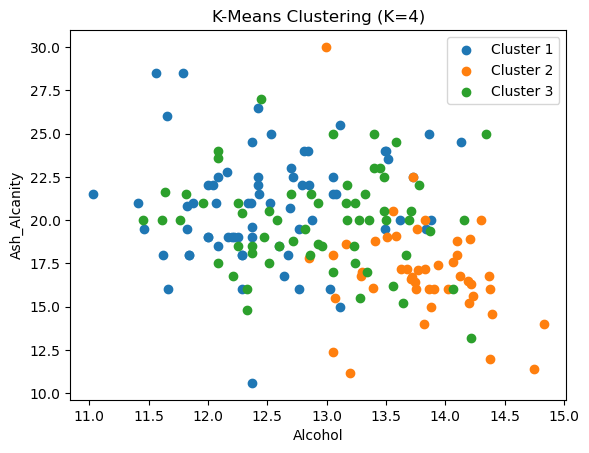

In [13]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Alcohol'], cluster_df['Ash_Alcanity'], label=f'Cluster {i + 1}')

plt.xlabel('Alcohol')
plt.ylabel('Ash_Alcanity')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

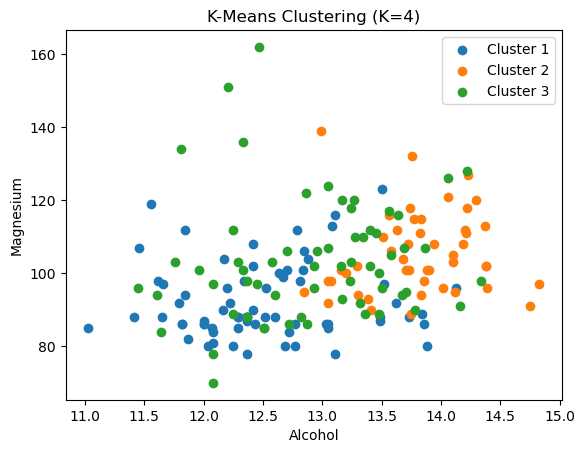

In [14]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Alcohol'], cluster_df['Magnesium'], label=f'Cluster {i + 1}')

plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

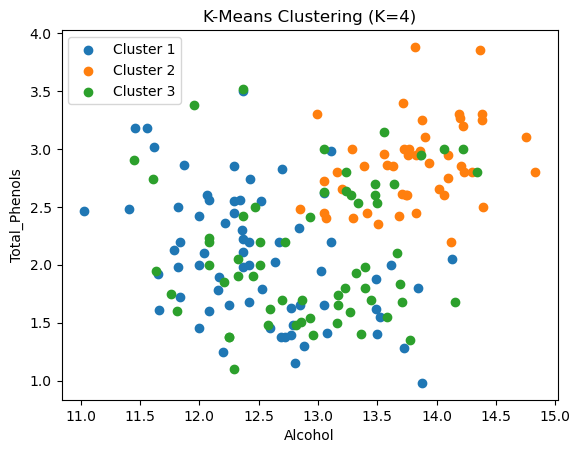

In [15]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Alcohol'], cluster_df['Total_Phenols'], label=f'Cluster {i + 1}')

plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

In [21]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

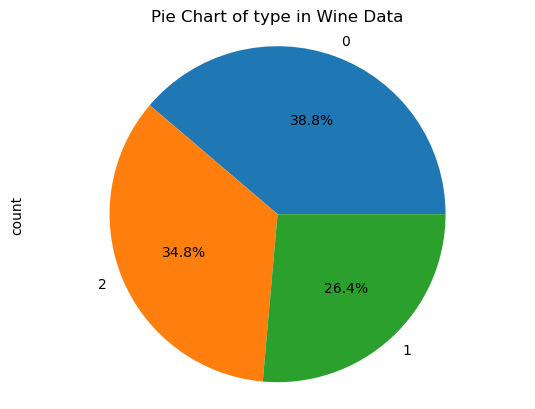

In [30]:
df.Cluster.value_counts().plot.pie(autopct = '%1.1f%%',
                                     title = "Pie Chart of type in Wine Data")

plt.axis('equal')
plt.show